# Transient gradient artifact filtering in the Fourier domain on 2D time-resolved spectroscopy map

# Licence
MIT license

# Credit
M. Vega, J-F. Bryche, P.L. Karsenti, P. Gogol, G. Beaudin, M. Canva, P.G. Charette

- Laboratoire Nanotechnologies et Nanosystèmes (LN2), Centre National de la Recherce Scientifique (CNRS)

- Laboratoire Charles Fabry (LCF), Centre de Nanosciences et de Nanotechnologies (C2N), Université Paris-Saclay

- Institut Interdisciplinaire d'Innovation Technologique (3iT), Université de Sherbrooke (UdS)


# Package requirements and information
See `README.md` and `requirements.txt` in the project root directory

# Initializations

In [1]:
import matplotlib.pyplot as plt
from transient_grating_artifact_filter import transient_grating_artifact_filter

In [2]:
# Matplotlib initializations
plt.rcParams.update(
    {
        "figure.dpi": 200,
        "figure.figsize": [10, 5],
        "font.size": 6,
        "lines.linewidth": 0.5,
        "axes.linewidth": 0.5,
        "image.cmap": "coolwarm",
    },
)

# Filtering parameters

In [3]:
# Thresholds for filter construction
threshold_ellipse: float = 0.1
threshold_center_pass_band: float = 0.5

# Optional parameters
cross_pass_band_width: int = 0
upper_left_lower_right_quadrant_pass_band: bool = True
gaussian_blur_sigma: float = 3
lambda_time_profile: float = 0.0

# Experimental data
Example data files in ".mat" (Matlab) and ".xlsx" (Excel) file formats in the *data* subdirectory

In [4]:
# Choice of sample to simulate: "gold_film", "nano_crosses", "nano_rods", or "rhodamine"
substrate_type: str = "gold_film"

# Define simulation parameters for the selected sample
if substrate_type == "gold_film":
    # Unstructured (smooth) gold film
    fname: str = "Unstructured-metal-parallel-pol.mat"
    lambda0_pump: float = 600.0
    artifact_extent_λ: float = 26
    artifact_extent_t: float = 0.35

elif substrate_type == "nano_crosses":
    # Structured gold film (nano-crosses)
    fname = "Nano-crosses.mat"
    lambda0_pump = 675.0
    artifact_extent_λ = 26
    artifact_extent_t = 0.35
    lambda_time_profile = 673.0

elif substrate_type == "nano_rods":
    # Structured gold film (nano-rods)
    fname = "Nano-rods.mat"
    lambda0_pump = 600.0
    artifact_extent_λ = 25
    artifact_extent_t = 0.47

elif substrate_type == "rhodamine":
    # Rhodamine solution atop unstructured gold film
    fname = "Rhodamine.mat"
    lambda0_pump = 570.0
    artifact_extent_λ = 22
    artifact_extent_t = 0.55
    lambda_time_profile = 567

else:
    raise ValueError("Unknown substrate type!")


# Filtering
Files written to the *output* subdirectory

transient_grating_artifact_filter.py v0.9.0 (running Python 3.11.4)


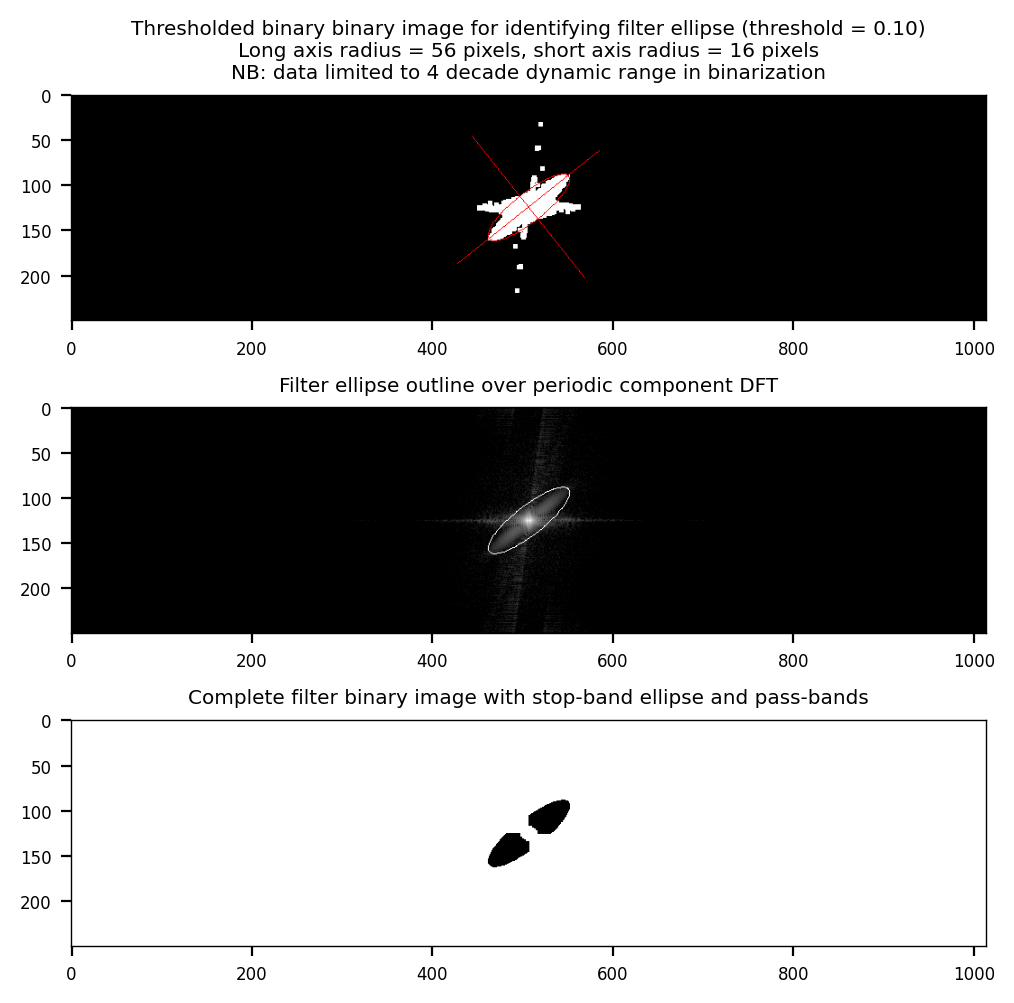

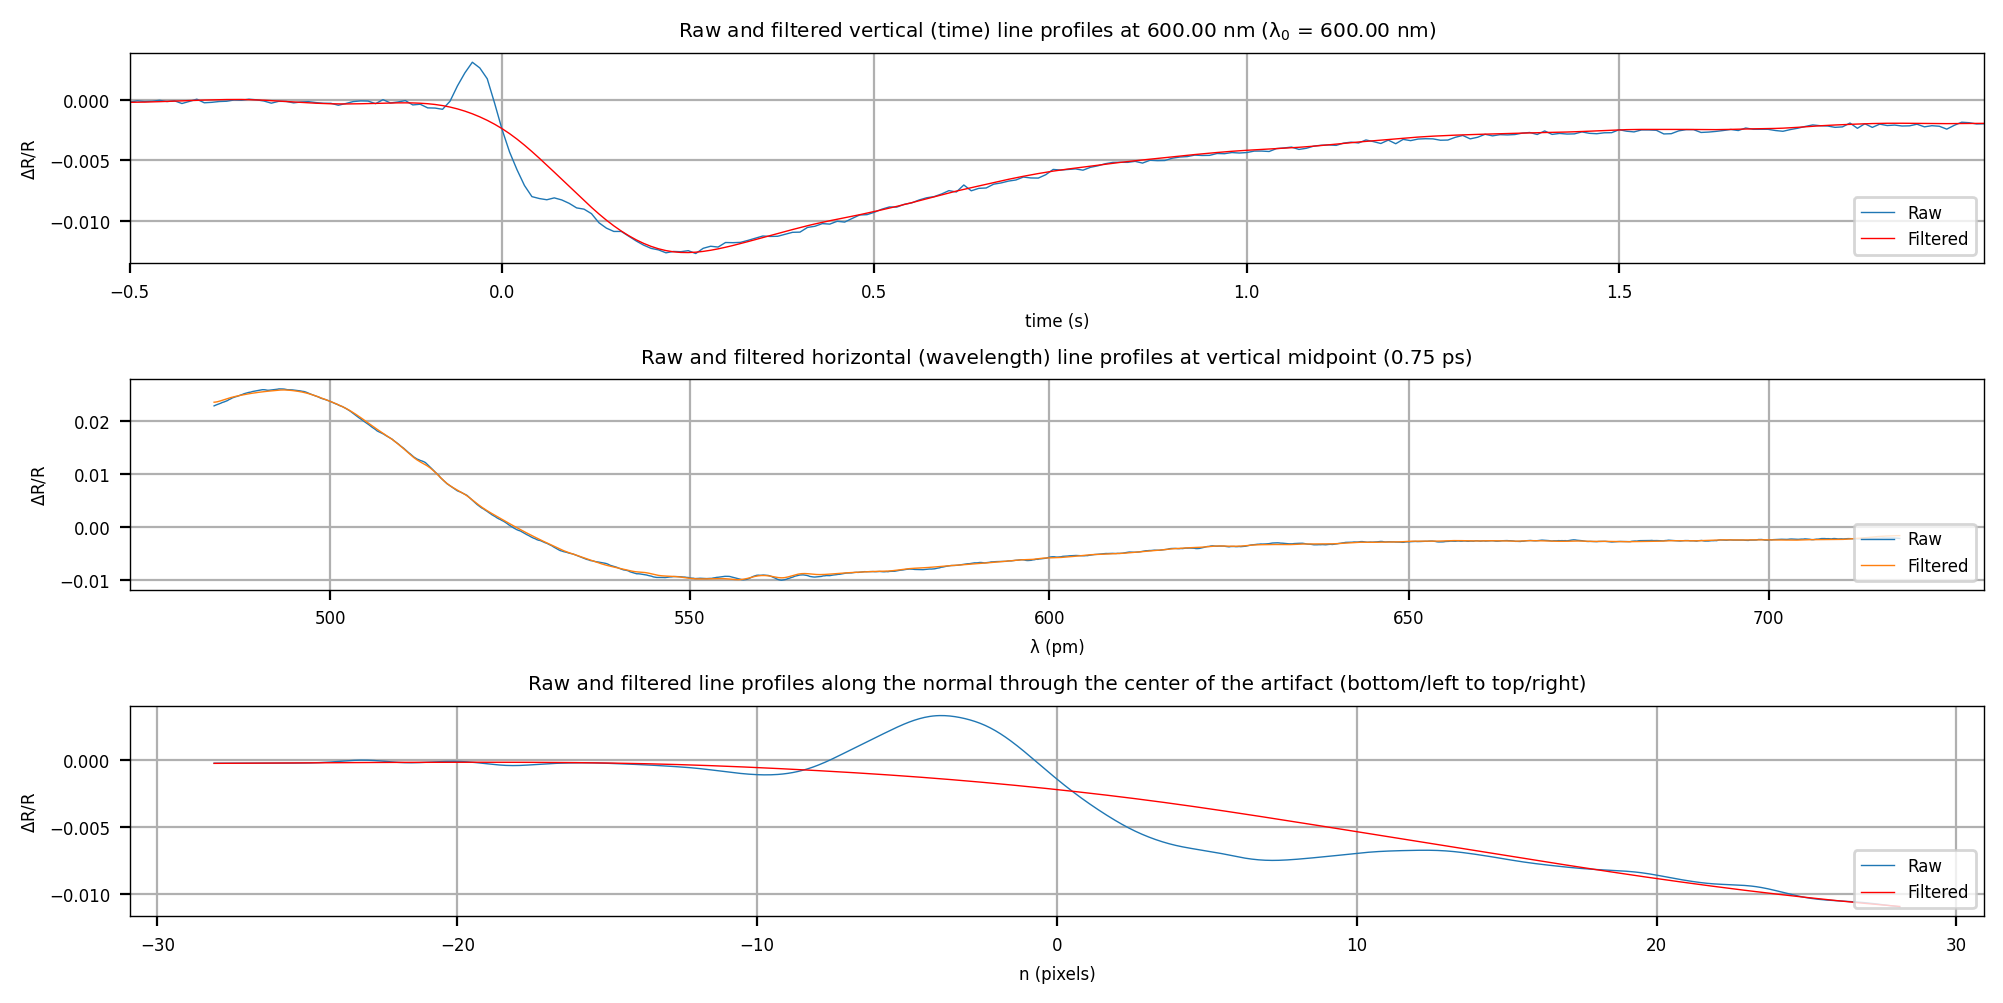

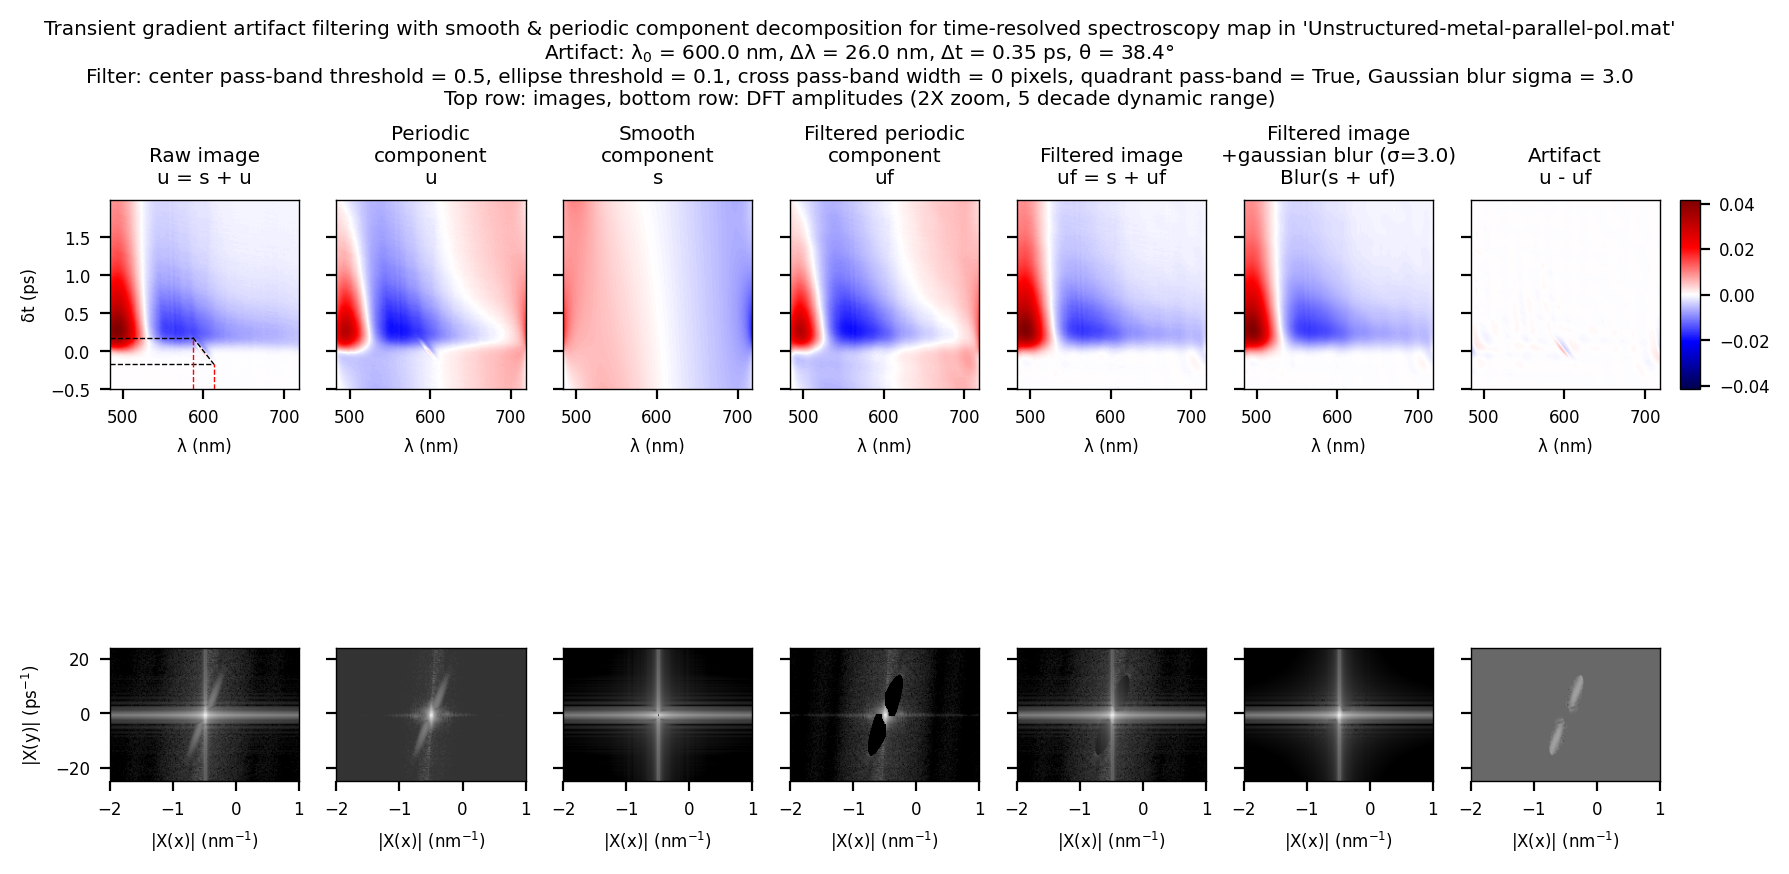

In [5]:
result = transient_grating_artifact_filter(
    fname=fname,
    lambda0_pump=lambda0_pump,
    artifact_extent_lambda=artifact_extent_λ,
    artifact_extent_t=artifact_extent_t,
    threshold_ellipse=threshold_ellipse,
    threshold_center_pass_band=threshold_center_pass_band,
    lambda_time_profile=lambda_time_profile,
    cross_pass_band_width=cross_pass_band_width,
    upper_left_lower_right_quadrant_pass_band=upper_left_lower_right_quadrant_pass_band,
    gaussian_blur_sigma=gaussian_blur_sigma,
)